In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
from keras.utils import np_utils
from skimage.transform import resize
from keras.preprocessing import image  

Using TensorFlow backend.


In [2]:
count=0
vfile="Tom and jerry.mp4"
cap=cv2.VideoCapture(vfile)
frate=cap.get(5)
x=1
while(cap.isOpened()):
    fid=cap.get(1)
    ret,frame=cap.read()
    if ret!=True:
        break
        if fid%math.floor(frate)==0:
            fname="frame%d.jpg"%count
            count+=1
            cv2.imwrite(fname,frame)
cap.release()
print("Completed!")

Completed!


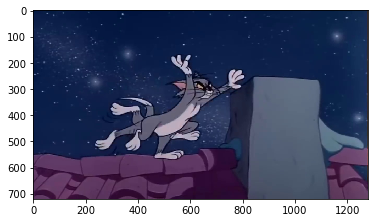

In [3]:
img=plt.imread("frame151.jpg")
plt.imshow(img)

In [4]:
data=pd.read_csv("mapping.csv")
data.head()

,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,2
3,frame3.jpg,2
4,frame4.jpg,2


In [5]:
arr=[]
for name in data.Image_ID:
    img=plt.imread(""+name)
    arr.append(img)
arr=np.array(arr)

In [6]:
y=data.Class
y=np_utils.to_categorical(y)


In [8]:
image=[]
for i in range(0,arr.shape[0]):
    a=resize(arr[i],preserve_range=True,output_shape=(224,224)).astype(int)
    image.append(a)
arr=np.array(image)

In [9]:
from keras.applications.vgg16 import preprocess_input

In [10]:
arr=preprocess_input(arr,mode='tf')

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(arr,y,test_size=0.3)

In [12]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense,InputLayer,Dropout

In [29]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) 

In [31]:
X_train=base_model.predict(X_train)
X_test=base_model.predict(X_test)
X_train.shape,X_test.shape

ValueError: Error when checking input: expected input_5 to have 4 dimensions, but got array with shape (208, 25088)

In [15]:
X_train=X_train.reshape(208,7*7*512)
X_test=X_test.reshape(90,7*7*512)

In [32]:
train=X_train/X_train.max()
X_test=X_test/X_train.max()

In [33]:
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(3, activation='softmax'))    # output layer


In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 3075      
Total params: 25,694,211
Trainable params: 25,694,211
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Train on 208 samples, validate on 90 samples
Epoch 1/100
208/208 [==============================] - 8s 37ms/step - loss: 7.6733 - accuracy: 0.3606 - val_loss: 3.3928 - val_accuracy: 0.2778
Epoch 2/100
208/208 [==============================] - 6s 29ms/step - loss: 5.9771 - accuracy: 0.5144 - val_loss: 2.0029 - val_accuracy: 0.3556
Epoch 3/100
208/208 [==============================] - 7s 33ms/step - loss: 3.2127 - accuracy: 0.5000 - val_loss: 0.8430 - val_accuracy: 0.5333
Epoch 4/100
208/208 [==============================] - 6s 28ms/step - loss: 0.9893 - accuracy: 0.6298 - val_loss: 1.9814 - val_accuracy: 0.4333
Epoch 5/100
208/208 [==============================] - 6s 29ms/step - loss: 0.9422 - accuracy: 0.4327 - val_loss: 1.8694 - val_accuracy: 0.4000
Epoch 6/100
208/208 [==============================] - 6s 27ms/step - loss: 0.6003 - accuracy: 0.7692 - val_loss: 1.2042 - val_accuracy: 0.4556
Epoch 7/100
208/208 [==============================] - 6s 29ms/step - loss: 0.4808 - accura

208/208 [==============================] - 6s 30ms/step - loss: 0.0102 - accuracy: 0.9952 - val_loss: 1.1847 - val_accuracy: 0.4889
Epoch 58/100
208/208 [==============================] - 6s 28ms/step - loss: 0.0100 - accuracy: 0.9952 - val_loss: 1.2145 - val_accuracy: 0.4889
Epoch 59/100
208/208 [==============================] - 6s 29ms/step - loss: 0.0100 - accuracy: 0.9904 - val_loss: 1.2398 - val_accuracy: 0.4889
Epoch 60/100
208/208 [==============================] - 6s 28ms/step - loss: 0.0100 - accuracy: 0.9904 - val_loss: 1.2222 - val_accuracy: 0.4889
Epoch 61/100
208/208 [==============================] - 5s 26ms/step - loss: 0.0098 - accuracy: 0.9952 - val_loss: 1.2143 - val_accuracy: 0.4889
Epoch 62/100
208/208 [==============================] - 5s 26ms/step - loss: 0.0099 - accuracy: 0.9904 - val_loss: 1.2227 - val_accuracy: 0.4889
Epoch 63/100
208/208 [==============================] - 6s 28ms/step - loss: 0.0097 - accuracy: 0.9952 - val_loss: 1.2135 - val_accuracy: 0.488

In [22]:
count=0
vfile="Tom and jerry 3.mp4"
cap=cv2.VideoCapture(vfile)
frate=cap.get(5)
x=1
while(cap.isOpened()):
    fid=cap.get(1)
    ret,frame=cap.read()
    if ret!=True:
        break
        if fid%math.floor(frate)==0:
            fname="test%d.jpg"%count
            count+=1
            cv2.imwrite(fname,frame)
cap.release()
print("Completed!")

Completed!


In [23]:
test = pd.read_csv('test.csv')
test.head(10)

,Image_ID
0,test0.jpg
1,test1.jpg
2,test2.jpg
3,test3.jpg
4,test4.jpg
5,test5.jpg
6,test6.jpg
7,test7.jpg
8,test8.jpg
9,test9.jpg


In [24]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [25]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

In [37]:
# preprocessing the images
test_image = preprocess_input(test_image, mode='tf')

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)

# converting the images to 1-D form
test_image = test_image.reshape(186, 7*7*512)

# zero centered images
test_image = test_image/test_image.max()

In [38]:
predictions = model.predict_classes(test_image)

In [39]:
print("The screen time of JERRY is", predictions[predictions==1].shape[0], "seconds")
print("The screen time of TOM is", predictions[predictions==2].shape[0], "seconds")

The screen time of JERRY is 0 seconds
The screen time of TOM is 186 seconds
